
# Project:TMBD 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


**WHAT ARE TOP CATTEGORY  MOVIE ?

**WHAT IS THE MOST PROFITABLE COMPANY SINCE 1990 ?

**WHAT COMPANY HAS THE HIGHEST MOVIE COUNT SINCE 1990 ?

**IN WHICH MONTHS MORE MOVIES ARE PRODUCED ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [3]:
df = pd . read_csv ("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
display (df.shape,df.info())

##id','popularity','budget','revenue','original_title','director','runtime','genres','production_companies','vote_count','vote_average','release_date','release_year'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

None

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#now drop unused colo
df.drop(['imdb_id', 'cast' , 'homepage' ,'tagline' ,'keywords','overview','budget_adj','revenue_adj'] , axis = 'columns', inplace = True )
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Drop zero values 

In [8]:
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                5170 non-null   float64
 3   revenue               4850 non-null   float64
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10835 non-null  float64
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.2+ MB


In [11]:
## no of col with its null values
df.isnull() . sum ()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [12]:
## no of rows with its null values
df.isnull() .any(axis=1). sum () 

7058

In [13]:
#delete duplicate rows 
df. drop_duplicates(inplace = True)

# DATA CLEANING

In [14]:
df.dtypes 

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [15]:
#change data type of release date 
df['release_date'] = df['release_date'] .  astype ('datetime64[ns]')
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [16]:
sum(df.duplicated())

0

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (TOP REVENUE MOVIES , GENERES THAT MAKE MORE MONEY AND REVENUE TO PROFET PLOT )

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [19]:
df_top = df[df ['revenue'] >= 1000000000] . sort_values (by='revenue' ,ascending=False)
df_top .head(20)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,David Yates,130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,Chris Buck|Jennifer Lee,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,Shane Black,130.0,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013


# top geners 

In [20]:
df_top ['genres'] .value_counts()

Adventure|Fantasy|Action                     3
Action|Adventure|Science Fiction             2
Action|Adventure|Fantasy|Science Fiction     1
Drama|Romance|Thriller                       1
Action|Crime|Thriller                        1
Action|Crime|Drama|Thriller                  1
Adventure|Action|Fantasy                     1
Action|Science Fiction|Adventure             1
Action|Adventure|Science Fiction|Thriller    1
Action|Adventure|Thriller                    1
Family|Fantasy|Adventure                     1
Drama|Action|Crime|Thriller                  1
Family|Animation|Adventure|Comedy            1
Animation|Family|Comedy                      1
Crime|Drama|Mystery|Thriller|Action          1
Adventure|Family|Fantasy                     1
Action|Adventure|Science Fiction|Fantasy     1
Science Fiction|Action|Adventure             1
Animation|Adventure|Family                   1
Name: genres, dtype: int64

In [21]:
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

Text(0.5, 1.0, 'TOP GENRES')

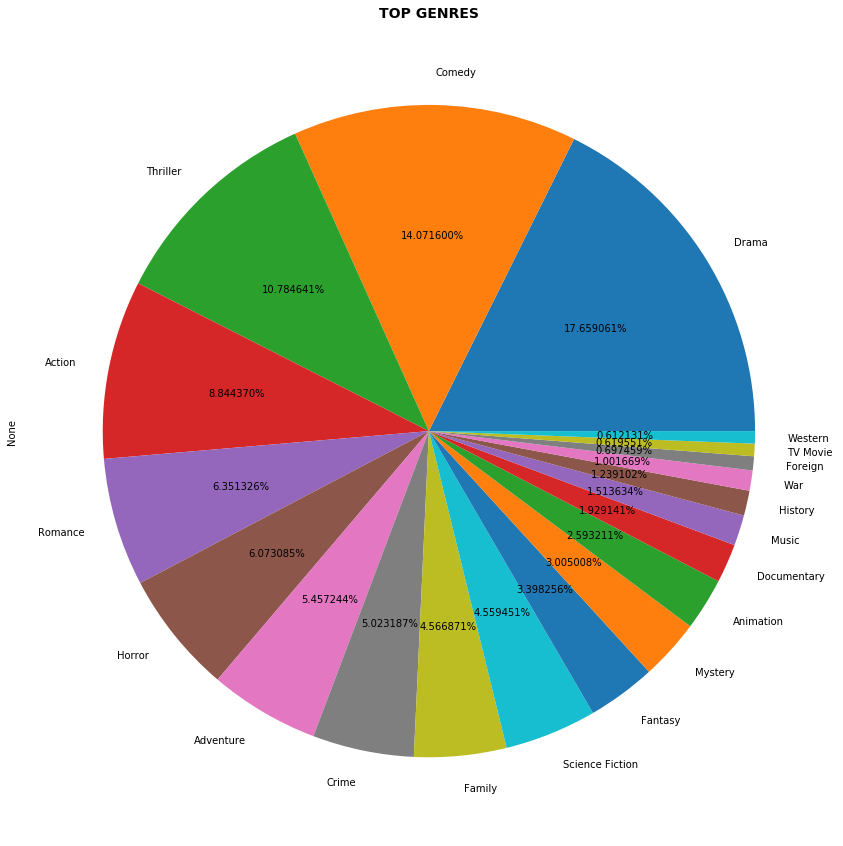

In [41]:
separate_count("genres").plot(kind="pie",figsize=(15,15),autopct="%1f%%")
plt.title("TOP GENRES",  fontsize = 14, weight = "bold")

top movies are drama movies with 17% and then comedy with 14% 

# top moveis revenue to budget

Text(0.5, 1.0, 'Budget Compared To Revenue')

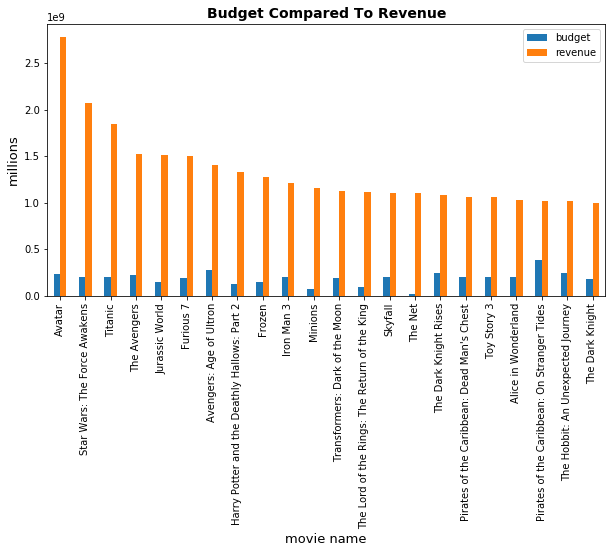

In [38]:
df_top.index = df_top.original_title
df_top[['budget','revenue']].plot(kind="bar", figsize=(10,5))
plt.ylabel('millions',fontsize = 13)
plt.xlabel('movie name',fontsize = 13)
plt.title('budget compared to revenue'.title(),
               fontsize = 14, weight = "bold")

### Research Question 2  (Which Month Released Highest Number Of Movies In All Of The Years?)

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [25]:
#extract the month number from the release date.
month_ofrelease = df['release_date'] . dt.month
#count the movies in each month using value_counts()
number_ofrelease = month_ofrelease . value_counts().sort_index()
number_ofrelease

1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: release_date, dtype: int64

In [26]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_ofrelease.index=months
number_ofrelease

Jan     919
Feb     691
Mar     822
Apr     797
May     809
Jun     827
Jul     799
Aug     918
Sep    1331
Oct    1153
Nov     814
Dec     985
Name: release_date, dtype: int64

In [27]:
monthdframe =pd.DataFrame(number_ofrelease)
monthdframe

,release_date
Jan,919
Feb,691
Mar,822
Apr,797
May,809
Jun,827
Jul,799
Aug,918
Sep,1331
Oct,1153


Text(0.5, 1.0, 'No Of Movies Produced Each Month')

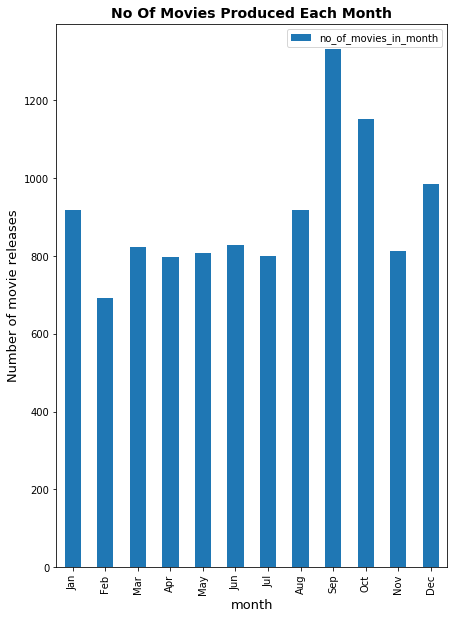

In [36]:
monthdframe.rename(columns = {'release_date' : 'no_of_movies_in_month'} , inplace = True)
monthdframe.plot(kind="bar", figsize=(7,10))
plt.ylabel('Number of movie releases',fontsize = 13)
plt.xlabel('month',fontsize = 13)
plt.title('no of movies produced each month'.title(),
               fontsize = 14, weight = "bold")

most movies are relesed in septamper and october

# Research Question 2 (In recent years, the production company which is the most profitable? )

In [29]:
## using first mention studio 
df_prod = df.copy()
df_prod.production_companies =  df_prod.production_companies.str.split ('|'). str[0]
df_prod . dropna()
df_prod . head()
display (df_prod.shape,df_prod . head())


(10865, 13)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures,2015-04-01,2947,7.3,2015


In [30]:
df_prod = df_prod.query('release_year >=1990')
df_prod .shape

(8932, 13)

In [31]:
group = df_prod.groupby("production_companies", as_index=False)
production = group.sum()[ ['production_companies' , 'revenue'] ]
production['movie_counts'] = group.count()['id']
production['mean_revenue'] = group.mean()['revenue']
production
top10_production = production.sort_values(by='revenue', ascending=False)[:15]
top10_production.head(15)


,production_companies,revenue,movie_counts,mean_revenue
2392,Universal Pictures,3.436412e+10,322,1.414161e+08
1749,Paramount Pictures,3.324745e+10,283,1.490917e+08
2463,Walt Disney Pictures,3.199613e+10,197,2.622634e+08
530,Columbia Pictures,2.827580e+10,221,1.634440e+08
2350,Twentieth Century Fox Film Corporation,2.128467e+10,158,1.542367e+08
1624,New Line Cinema,1.423557e+10,197,9.243877e+07
2430,Village Roadshow Pictures,1.205129e+10,79,1.772249e+08
701,DreamWorks SKG,1.074996e+10,73,1.762288e+08
1459,Marvel Studios,8.670372e+09,27,5.780248e+08
2469,Warner Bros.,8.042972e+09,83,1.489439e+08


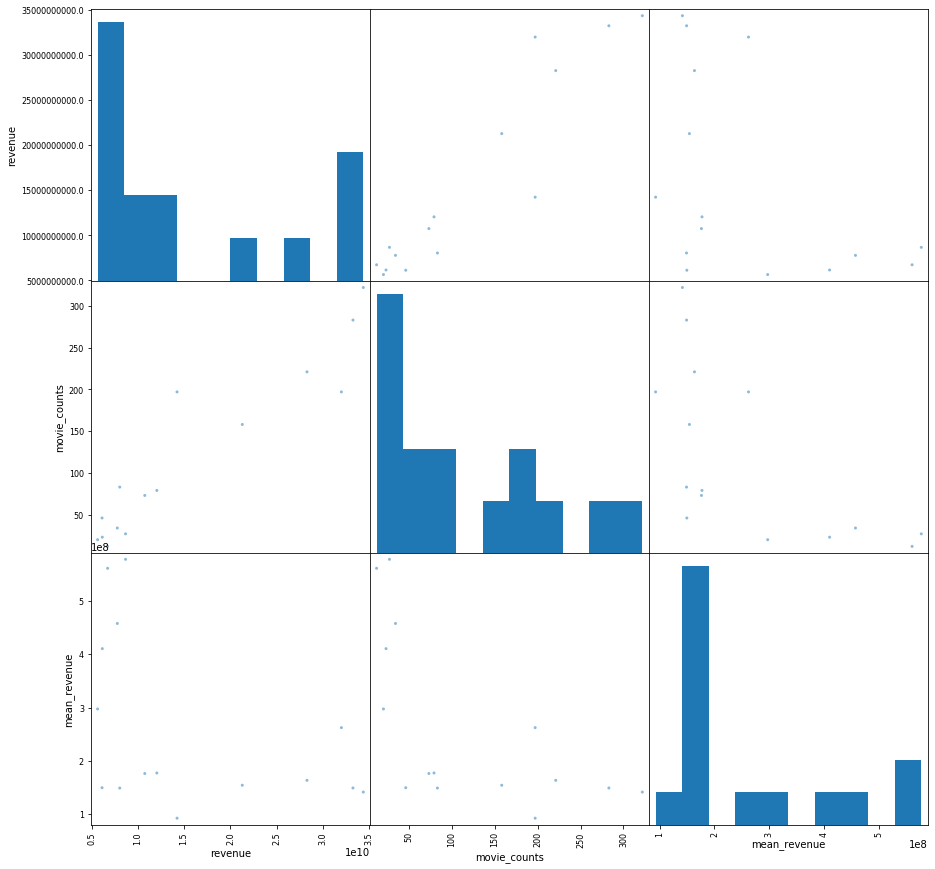

In [32]:
pd.plotting.scatter_matrix(top10_production , figsize=(15,15));


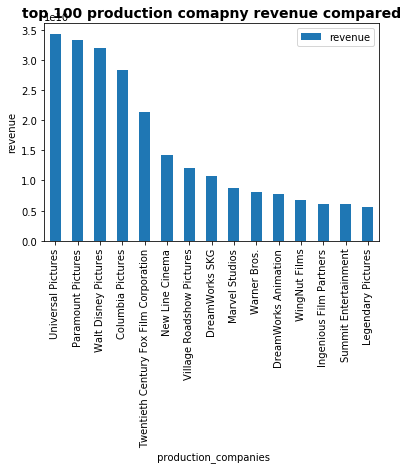

In [40]:

top10_production.plot(x= 'production_companies' , y ='revenue' , kind ='bar');
plt.title('top 100 production comapny revenue compared' , fontsize = 14, weight = "bold" );
plt.ylabel('revenue');
plt.xlabel(' production_companies');

Walt Disney Pictures is the most profitable company scince 1990 

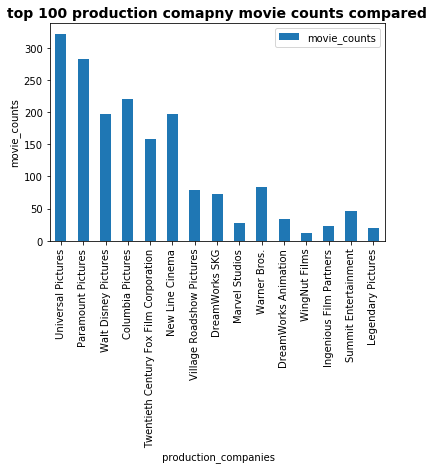

In [39]:
top10_production.plot(x= 'production_companies' , y ='movie_counts' , kind ='bar');
plt.title('top 100 production comapny movie counts compared' ,  fontsize = 14, weight = "bold");
plt.ylabel('movie_counts');
plt.xlabel(' production_companies');

Universal picture has highest movie count scince 1990

<a id='conclusions'></a>
## Conclusions

# LIMITATION 

It's not 100 percent ensured arrangement that this equation is gonna work, But it appears us that we have tall likelihood of making tall benefits in case we had comparative characteristics as such. On the off chance that we discharge a motion picture with these characteristics, it gives individuals tall desires from this motion picture. This was fair one case of an influantial calculate that would lead to distinctive comes about, there are numerous that have to be be taken care of.

During the data cleaning prepare, I part the information seperated by '|' into records for simple parsing amid the investigation stage. This increments the time taken in calculating the result.